# Timescales

Test script, to be integrated in main pipeline

In [51]:
import os
os.chdir("/Users/luisa/Desktop/nygc/cluster/projects/fl4tsf/bin")

import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
import seaborn as sns
import sys
import json
import glob
from lib import utils

sys.path.append(os.getcwd()) 
sns.set(style='whitegrid')
from lib.dataset_utils import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

from lib.plot_utils import read_loss_file,prepare_df_for_plotting, get_summary_lambdas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### monitor number of ODEs

In [52]:
result_json = glob.glob(f"../results_timescales/**/federated_training/**/**/**/results.json", recursive=True)
result_json = list(set(result_json))
result_json

['../results_timescales/timescales/federated_training/FedODE/20_rounds/rep_1-alpha_1.0-lr_0.001-batchsize_32_clipping_False_lrdecay_1.0_localepochs_5_decayonset_15_alpha_1.0/federated_outputs/results.json',
 '../results_timescales/timescales/federated_training/FedODE/20_rounds/rep_1-alpha_0.5-lr_0.001-batchsize_32_clipping_False_lrdecay_1.0_localepochs_5_decayonset_15_alpha_0.5/federated_outputs/results.json',
 '../results_timescales/timescales/federated_training/FedODE/20_rounds/rep_1-alpha_0.0-lr_0.001-batchsize_32_clipping_False_lrdecay_1.0_localepochs_5_decayonset_15_alpha_0.0/federated_outputs/results.json']

In [53]:
df_centralized_evaluate = pd.DataFrame()
df_federated_evaluate = pd.DataFrame()
df_aggregation = pd.DataFrame()
for file in result_json:
    df_centralized_evaluate_temp, df_federated_evaluate_temp, df_aggregation_temp = read_loss_file(file)
    df_centralized_evaluate = pd.concat([df_centralized_evaluate, df_centralized_evaluate_temp])
    df_federated_evaluate = pd.concat([df_federated_evaluate, df_federated_evaluate_temp])
    df_aggregation = pd.concat([df_aggregation, df_aggregation_temp])
df = pd.concat([df_centralized_evaluate, df_federated_evaluate])
df_summary_lambdas = get_summary_lambdas(df_aggregation)

In [54]:
df_summary_lambdas

,round,lambda,steps,alpha,client
0,1,0.500000,5198,1.0,1
1,2,0.500000,650,1.0,0
2,3,0.500000,650,1.0,0
3,4,0.500000,662,1.0,0
4,5,0.500000,890,1.0,0
...,...,...,...,...,...
115,16,0.015740,998,0.0,0
116,17,0.019009,992,0.0,0
117,18,0.986018,69110,0.0,1
118,19,0.984115,67406,0.0,1


<Figure size 1000x300 with 0 Axes>

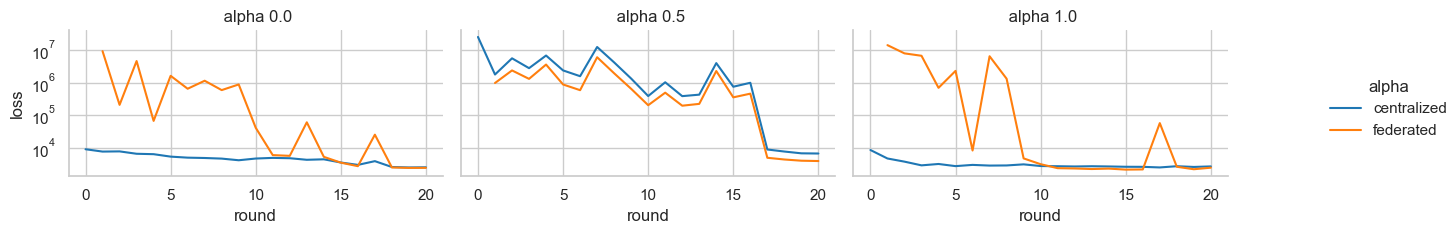

In [61]:
loss_df = df[df['type'].isin(["centralized", "federated"])]


# fig size
plt.figure(figsize=(10, 3))
# Create FacetGrid
g = sns.FacetGrid(
    loss_df,
    col="alpha",
    height=2.5,
    aspect=1.5,  # Width = height * aspect
    sharey=True
)

# Map the lineplot onto the grid
g.map_dataframe(
    sns.lineplot,
    x='round',
    y='loss',
    hue='type',
    palette='tab10'
)

# Adjustments
g.set_axis_labels("round", "loss")
g.set_titles(" alpha {col_name}")
#g.set(ylim=(0, None))

# Move legend outside
g.add_legend(title ="alpha")
g._legend.set_bbox_to_anchor((1.05, 0.5))
# legend 
g._legend.set_loc("center left")
# title
# y axis log

plt.yscale('log')

plt.tight_layout()
plt.show()


In [60]:
df[df["type"]== "centralized"]

,round,loss,centralized_accuracy,lr,batch_size,clipping,lrdecay,localepochs,decay_onset,dataset_name,alpha,aggregation,hyperparameters,type,federated_evaluate_accuracy
0,0,8487.851562,1.710473,0.001,32,False,1.0,5,15,timescales,1.0,FedODE,"lr: 0.001, batch_size: 32, clipping: False, lr...",centralized,NaN
1,1,4664.473145,0.937604,0.001,32,False,1.0,5,15,timescales,1.0,FedODE,"lr: 0.001, batch_size: 32, clipping: False, lr...",centralized,NaN
2,2,3731.776123,0.751014,0.001,32,False,1.0,5,15,timescales,1.0,FedODE,"lr: 0.001, batch_size: 32, clipping: False, lr...",centralized,NaN
3,3,2870.544189,0.576926,0.001,32,False,1.0,5,15,timescales,1.0,FedODE,"lr: 0.001, batch_size: 32, clipping: False, lr...",centralized,NaN
4,4,3164.034098,0.634606,0.001,32,False,1.0,5,15,timescales,1.0,FedODE,"lr: 0.001, batch_size: 32, clipping: False, lr...",centralized,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,16,2967.897624,0.599637,0.001,32,False,1.0,5,15,timescales,0.0,FedODE,"lr: 0.001, batch_size: 32, clipping: False, lr...",centralized,NaN
17,17,3864.389242,0.775361,0.001,32,False,1.0,5,15,timescales,0.0,FedODE,"lr: 0.001, batch_size: 32, clipping: False, lr...",centralized,NaN
18,18,2552.573079,0.512491,0.001,32,False,1.0,5,15,timescales,0.0,FedODE,"lr: 0.001, batch_size: 32, clipping: False, lr...",centralized,NaN
19,19,2475.667643,0.497417,0.001,32,False,1.0,5,15,timescales,0.0,FedODE,"lr: 0.001, batch_size: 32, clipping: False, lr...",centralized,NaN


In [41]:
df_summary_lambdas

,round,lambda,steps,alpha,client
0,1,0.303685,644,0.5,0
1,2,0.704684,7184,0.5,1
2,3,0.690518,5036,0.5,1
3,4,0.314954,794,0.5,0
4,5,0.304149,890,0.5,0
...,...,...,...,...,...
75,16,0.500000,1088,1.0,0
76,17,0.500000,1220,1.0,0
77,18,0.500000,1334,1.0,0
78,19,0.500000,1502,1.0,0


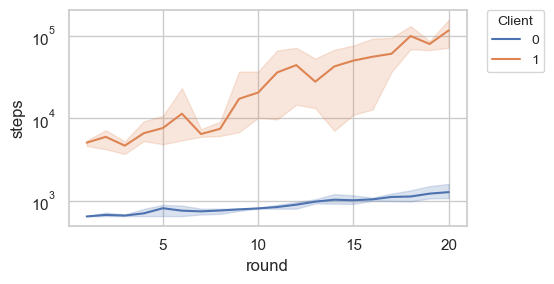

In [62]:
######################################
#  Plot the last loss vs difference
#######################################
plt.figure(figsize=(6, 3))
#df_summary_lambdas = df_summary_lambdas[df_summary_lambdas["alpha"]== 0.0]
sns.lineplot(data=df_summary_lambdas, x='round', y='steps',
             hue='client',  markers=True, dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           borderaxespad=0., title='Client', fontsize='small', title_fontsize='small')

plt.tight_layout()
# make y axis log scale
plt.yscale('log')
plt.show()